In [1]:
import sys

sys.path.append('../')
import rings2cosmo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from astropy import constants as const
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0 = 67.3, Om0 = 0.315)

In [2]:
data = pd.read_csv('../Data/sample80.csv')
data.head()

,name,zl,zs,sigma_0,dsigma_0,theta_E,theta_ap,sigma_atm,sigma_ap,d_sigma_ap
0,J2321-0939,0.082,0.532,246,8,1.60,1.5,1.4,249,8
1,J1106+5228,0.096,0.407,268,13,1.23,1.5,1.4,262,13
2,J1143-0144,0.106,0.402,264,13,1.68,1.5,1.4,269,13
3,J0841+3824,0.116,0.657,222,11,1.41,1.5,1.4,225,11
4,J0044+0113,0.120,0.196,267,13,0.79,1.5,1.4,266,13


In [3]:
z_L = data['zl'].values
z_S = data['zs'].values
theta_E = (data['theta_E'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
theta_ap = (data['theta_ap'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
seeing_atm = (data['sigma_atm'].values * rings2cosmo.u.arcsec).to(rings2cosmo.u.rad).value
velDisp = data['sigma_ap'].values
velDispErr = data['d_sigma_ap'].values

#About the parameters value and distribution
alpha = 2.0
virial_frac = 0.18
delta = 2.40

gamma = 1.0

In [4]:
rings2cosmo.vel(z_S, z_L, theta_E, seeing_atm, theta_ap,virial_frac, alpha,delta, gamma)

array([236.71544946, 218.76848464, 260.76565328, 226.51047603,
       246.70180934, 229.73207757, 202.76698918, 232.08536596,
       221.71292203, 264.6461934 , 257.29216411, 231.99654056,
       231.62014748, 201.29917636, 239.55012949, 205.7017671 ,
       222.15673205, 244.16437062, 260.91121522, 268.83084674,
       234.52822299, 250.53535674, 260.73320935, 220.45928467,
       259.31441133, 232.68011623, 191.17686779, 198.85609537,
       226.13357159, 274.56146573, 222.87691698, 261.89928262,
       247.52799969, 260.32462413, 284.47461404, 206.08492581,
       277.62668342, 234.29235751, 222.69249277, 262.6128441 ,
       197.03452908, 229.55341586, 183.95604284, 230.46958202,
       226.94297782, 200.13029665, 290.75921745, 249.24124341,
       194.97687827, 225.6282764 , 229.16612167, 196.64711885,
       281.99902867, 293.70122706, 230.45117038, 268.29647562,
       266.11017935, 199.26550516, 258.82208344, 238.31516682,
       230.676984  , 259.81899342, 252.41857634, 246.17

In [5]:
import time

In [6]:
execution = []
for i in range(100):
    start_time = time.time()
    e = rings2cosmo.vel(z_S, z_L, theta_E, seeing_atm, theta_ap,virial_frac, alpha,delta, gamma)
    execution.append((time.time() - start_time))

execution

[13.540763139724731,
 12.860260486602783,
 12.952581882476807,
 12.914179801940918,
 12.888692140579224,
 12.781155586242676,
 13.515015602111816,
 12.773908376693726,
 11.883323669433594,
 10.954133749008179,
 12.650876522064209,
 12.931627035140991,
 12.83256983757019,
 12.88624620437622,
 12.841023445129395,
 12.751203536987305,
 12.8177809715271,
 12.693182468414307,
 12.82729458808899,
 12.728612899780273,
 12.672913551330566,
 12.60686206817627,
 12.842837572097778,
 12.680924415588379,
 12.74649715423584,
 12.593085765838623,
 12.67014741897583,
 12.638495683670044,
 12.727605104446411,
 12.753711462020874,
 12.807881832122803,
 12.834537506103516,
 12.767249584197998,
 12.69358777999878,
 12.695103645324707,
 12.729229211807251,
 17.24817657470703,
 12.28049612045288,
 12.82335877418518,
 12.80330777168274,
 12.909472703933716,
 12.843317747116089,
 12.766005992889404,
 12.856091260910034,
 12.741662740707397,
 12.921417713165283,
 12.146953344345093,
 15.048906087875366,
 13.1

(array([ 2.,  0.,  6., 81.,  4.,  2.,  3.,  0.,  0.,  2.]),
 array([10.39185286, 11.10694327, 11.82203369, 12.53712411, 13.25221453,
        13.96730494, 14.68239536, 15.39748578, 16.1125762 , 16.82766662,
        17.54275703]),
 <BarContainer object of 10 artists>)

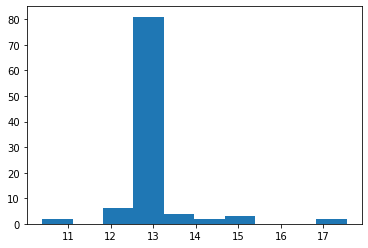

In [7]:
plt.hist(execution)

In [9]:
np.median(execution)

12.78117060661316

log probabilities

In [10]:
rings2cosmo.minimization_loglikelihood(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, virial_frac)

KeyboardInterrupt: 

In [6]:
mean_alpha = 2.0
var_alpha = 0.08
mean_delta = 2.4
var_delta = 0.11

#X_param = rings2cosmo.minimization_logprobability(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, virial_frac,)


In [12]:
start_time = time.time()
X_param = rings2cosmo.minimization_logprobability(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, virial_frac,)
end_time = time.time() 

/home/grasi/anaconda3/envs/Velocity_dispersion2022/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [13]:
end_time - start_time

3074.316337823868

In [14]:
X_param

(1.9955826679688822, 2.400139861826421, 0.8985651808779517)

In [7]:
### w/ constrains
start_time = time.time()
X_param = rings2cosmo.minimization_logprobability(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, virial_frac,)
end_time = time.time() 

In [8]:
end_time - start_time

435.91890573501587

In [9]:
X_param

(1.9955828741424766, 2.400132094301794, 0.8985611672692515)

## MCMC

In [ ]:
start_time = time.time()
n_dim = 3         # number of parameters in the model 
n_walkers = 64 # number of MCMC walkers 
n_burn = 500      # "burn-in" period to let chains stabilize
n_steps = 1000    # number of MCMC steps to take after burn-in
seed = 11
sampler = rings2cosmo.logprobability_sampling(z_S, z_L, velDisp, velDispErr, theta_E, seeing_atm, theta_ap, virial_frac,
                            seed = seed, alpha_ini = mean_alpha,  delta_ini = mean_delta, gamma_ini = gamma,  
                            alpha_0_value = mean_alpha, eps_alpha_0_value = var_alpha, 
                            delta_0_value=mean_delta, eps_delta_0_value=var_delta,
                            n_dim = n_dim, n_walkers = n_walkers, n_burn = n_burn, 
                            n_steps = n_steps, progress = True, processes = 10)
end_time = time.time() 

In [ ]:
end_time - start_time